---------------------------------------------------------------------------------------------

# The Sparks Foundation: Data Science and Business Analysis Intern GRIPOCTOBER21
# ROSHINI RAVINDRA KINI

----------------------------------------------------------------------------------------------------------------------------

# Importing the required libraries libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
print('yay! import was successful!!')


yay! import was successful!!


# Load the dataset

In [19]:

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.tail(10) # displays the last 10 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


# describe the dataset

In [20]:
iris_df.describe(include="all") # include="all" will describe about all the data types within the dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Finding the optimum number of clusters for k-means classification
# we do this so as to get the optimal number of clusters into which we have to cluster the data

C:\Users\rohan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


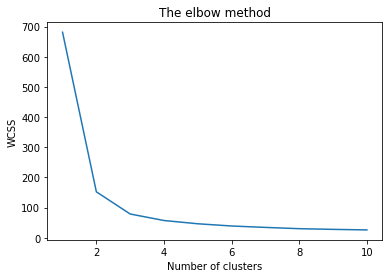

In [21]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values # all the coloumns and rows in an array format

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i) #the other parameters are default
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# we do this so as to get the optimal number of clusters into which we have to cluster the data
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

# Now we can apply kmeans to the dataset / Creating the kmeans classifier: class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')
# here n_clusters is taken as 3 because we just found out that it would be optimal from the elbow method. k-means++ is set as default value for the init parameter, 300 is again default iterations, random_state is set to 0

In [22]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Now we can visualize the clusters using the scatter type

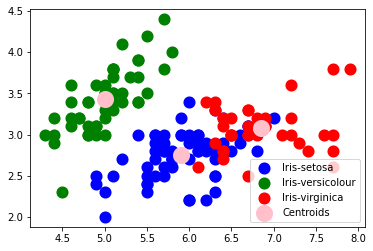

In [23]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 50, c = 'blue', linewidths = 5,  label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 50, c = 'green', linewidths = 5,  label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 50, c = 'red', linewidths = 5,  label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'pink',  linewidths = 10, label = 'Centroids')


plt.legend()